In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from truss import Node, Bar, Truss

In [3]:
n0 = Node(0,0, freex=False,freey=False)
n1 = Node(1,0, freey=False)
n2 = Node(0,1)
n3 = Node(1,1)

n3.apply_load(10**3, 0)

In [4]:
b0 = Bar(n0,n1)
b1 = Bar(n0,n2)
b2 = Bar(n0,n3)
b3 = Bar(n1,n2)
b4 = Bar(n1,n3)
b5 = Bar(n2,n3)
bars = [b0, b1, b2, b3, b4, b5]

In [5]:
b0p = Bar(n1, n0)

In [6]:
b0p == b0

True

In [7]:
b0p is b0

False

In [8]:
set([b0p, b0])

{B(N(1.00, 0.00), N(0.00, 0.00))}

In [9]:
with np.printoptions(precision=3, suppress=True):
    truss = Truss(bars)
    truss.solve(method="solve")
    print(truss.u)
    print(truss.stiffness)
    print(truss.F)
    

[ 0.001  0.     0.     0.001 -0.   ]
[[ 3051247.731  -796997.731  -796997.731 -2254250.           0.   ]
 [ -796997.731  3051247.731   796997.731        0.           0.   ]
 [ -796997.731   796997.731  3051247.731       -0.          -0.   ]
 [-2254250.           0.          -0.     3051247.731   796997.731]
 [       0.           0.          -0.      796997.731  3051247.731]]
[   0.    0.    0. 1000.    0.]


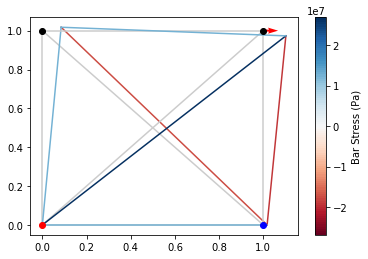

In [10]:
truss.plot(def_scale=100)

In [11]:
df_n, df_b = truss.details()

In [12]:
df_n

,ID,x (m),y (m),Free x?,Free y?,Force x (N),Force y (N),Delta x (m),Delta y (m)
0,0,0,1,True,True,0,0,0.000849,0.000176
1,1,1,0,True,False,0,0,0.000176,0.000000
2,2,0,0,False,False,0,0,0.000000,0.000000
3,3,1,1,True,True,1000,0,0.001025,-0.000268


In [13]:
df_b

,ID,Node 0,Node 1,E (GPa),w (mm),t (mm),A (mm2),I (mm4),L (m),Buckling Load (N),T (N),ext (mm),Stress (Pa),Strain (),Will buckle?
0,0,"N(1.00, 0.00)","N(0.00, 1.00)",71.0,5.0,6.35,31.75,66.145833,1.414214,23.175579,-560.660172,-0.351733,-1.765859e+07,-0.000249,True
1,1,"N(0.00, 0.00)","N(0.00, 1.00)",71.0,5.0,6.35,31.75,66.145833,1.000000,46.351158,396.446609,0.175866,1.248651e+07,0.000176,False
2,2,"N(1.00, 0.00)","N(1.00, 1.00)",71.0,5.0,6.35,31.75,66.145833,1.000000,46.351158,-603.553391,-0.267740,-1.900956e+07,-0.000268,True
3,3,"N(0.00, 0.00)","N(1.00, 1.00)",71.0,5.0,6.35,31.75,66.145833,1.414214,23.175579,853.553391,0.535480,2.688357e+07,0.000379,False
4,4,"N(0.00, 0.00)","N(1.00, 0.00)",71.0,5.0,6.35,31.75,66.145833,1.000000,46.351158,396.446609,0.175866,1.248651e+07,0.000176,False
5,5,"N(0.00, 1.00)","N(1.00, 1.00)",71.0,5.0,6.35,31.75,66.145833,1.000000,46.351158,396.446609,0.175866,1.248651e+07,0.000176,False


In [14]:
truss.volume()

0.00021680256121069151

In [21]:
n00 = Node(0,0.5,freex=False, freey=False)
n01 = Node(1,0.5, freey=False)
n11 = Node(0.5,0.5)
n11.apply_load(0, -10**2)
 
nodes = [Node(np.random.rand(),np.random.rand()) for n in range(10)]
nodes = [n00, n01, n11] + nodes

In [22]:
randTruss = Truss.from_delaunay(nodes)

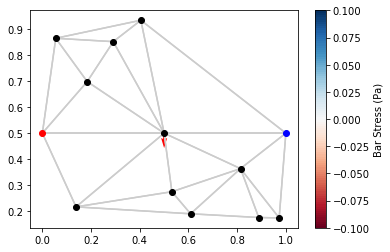

In [23]:
randTruss.plot()

In [24]:
randTruss.solve()

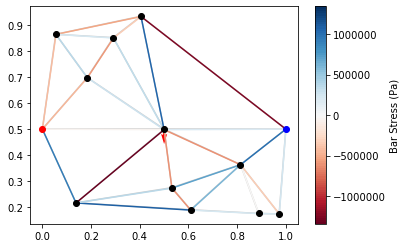

In [25]:
randTruss.plot(def_scale=100)

In [26]:
df_n, df_b = randTruss.details()
df_b

,ID,Node 0,Node 1,E (GPa),w (mm),t (mm),A (mm2),I (mm4),L (m),Buckling Load (N),T (N),ext (mm),Stress (Pa),Strain (),Will buckle?
0,0,"N(0.50, 0.50)","N(0.81, 0.36)",71.0,5.0,6.35,31.75,66.145833,0.342096,396.062428,-19.217622,-0.002916,-6.052794e+05,-8.525062e-06,False
1,1,"N(0.61, 0.19)","N(0.53, 0.27)",71.0,5.0,6.35,31.75,66.145833,0.114594,3529.699360,-18.892797,-0.000960,-5.950487e+05,-8.380968e-06,False
2,2,"N(0.61, 0.19)","N(0.14, 0.22)",71.0,5.0,6.35,31.75,66.145833,0.471184,208.775459,34.854293,0.007285,1.097773e+06,1.546159e-05,False
3,3,"N(0.05, 0.87)","N(0.40, 0.93)",71.0,5.0,6.35,31.75,66.145833,0.356314,365.086638,-16.457762,-0.002601,-5.183547e+05,-7.300771e-06,False
4,4,"N(0.29, 0.85)","N(0.40, 0.93)",71.0,5.0,6.35,31.75,66.145833,0.140050,2363.154292,-10.828855,-0.000673,-3.410663e+05,-4.803751e-06,False
5,5,"N(0.61, 0.19)","N(0.81, 0.36)",71.0,5.0,6.35,31.75,66.145833,0.268820,641.414111,19.197937,0.002289,6.046594e+05,8.516330e-06,False
6,6,"N(0.05, 0.87)","N(0.18, 0.70)",71.0,5.0,6.35,31.75,66.145833,0.210937,1041.725973,11.844680,0.001108,3.730608e+05,5.254377e-06,False
7,7,"N(0.00, 0.50)","N(0.05, 0.87)",71.0,5.0,6.35,31.75,66.145833,0.369433,339.616430,-13.093352,-0.002146,-4.123890e+05,-5.808296e-06,False
8,8,"N(0.00, 0.50)","N(0.18, 0.70)",71.0,5.0,6.35,31.75,66.145833,0.270945,631.391013,-14.367253,-0.001727,-4.525119e+05,-6.373407e-06,False
9,9,"N(0.00, 0.50)","N(0.50, 0.50)",71.0,5.0,6.35,31.75,66.145833,0.500000,185.404631,-1.211291,-0.000269,-3.815089e+04,-5.373365e-07,False
